#Online Payment Fraud Detection

#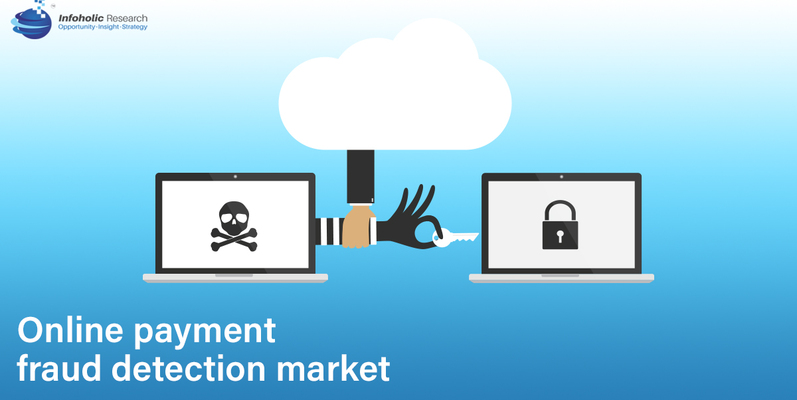

As online transactions continue to rise, so does the threat of online payment fraud. Fraudulent activities pose significant risks to businesses, financial institutions, and consumers, leading to financial losses and reputational damage. Traditional fraud detection methods often fall short in addressing the evolving tactics of fraudsters. Therefore, there is a growing need for advanced analytical techniques and machine learning algorithms to detect and prevent online payment fraud in real-time.

In this notebook, we will explore the field of online payment fraud detection using machine learning. By analyzing transactional data and leveraging predictive models, we aim to identify fraudulent activities accurately. Our goal is to contribute to the development of robust fraud detection systems that enhance the security of electronic transactions and build trust among users.

**The dataset consists of 10 variables:**

step: represents a unit of time where 1 step equals 1 hour

1.   step: represents a unit of time where 1 step equals 1 hour
2.   type: type of online transaction
1.   amount: the amount of the transaction
4.   nameOrig: customer starting the transaction
1.   oldbalanceOrg: balance before the transaction
1.   newbalanceOrig: balance after the transaction
1.   nameDest: recipient of the transaction
2.   oldbalanceDest: initial balance of recipient before the transaction
1.   newbalanceDest: the new balance of recipient after the transaction
2.   isFraud: fraud transaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary  Libraries
import numpy as np    # linear algebra
import pandas as pd   # data processing
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import random
import tensorflow as tf

#Loading the Dataset: "Online Payment Fraud Data"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/onlinefraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1305835,136,PAYMENT,3543.79,C1942730083,5031.00,1487.21,M469510990,0.00,0.00,0
3694973,277,CASH_IN,87722.78,C1286430402,40221.77,127944.55,C959221242,126459.01,38736.22,0
5733980,399,CASH_OUT,129236.30,C975968973,0.00,0.00,C370241847,1435851.66,1565087.96,0
1122257,130,PAYMENT,30452.31,C1656769919,0.00,0.00,M355170832,0.00,0.00,0
4039256,299,TRANSFER,37529.67,C1599488520,168371.68,130842.02,C103162523,95821.41,133351.08,0


#Exploratory Data Analysis

In [ ]:
df.shape

(6362620, 10)

In [ ]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
#Summary Statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


#Checking the Null Values

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

**Class Distribution**

In [ ]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

**Data Types and Variable Distribution**

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 5


                                                          ------**Data visualization**------



#Box Plot Analysis

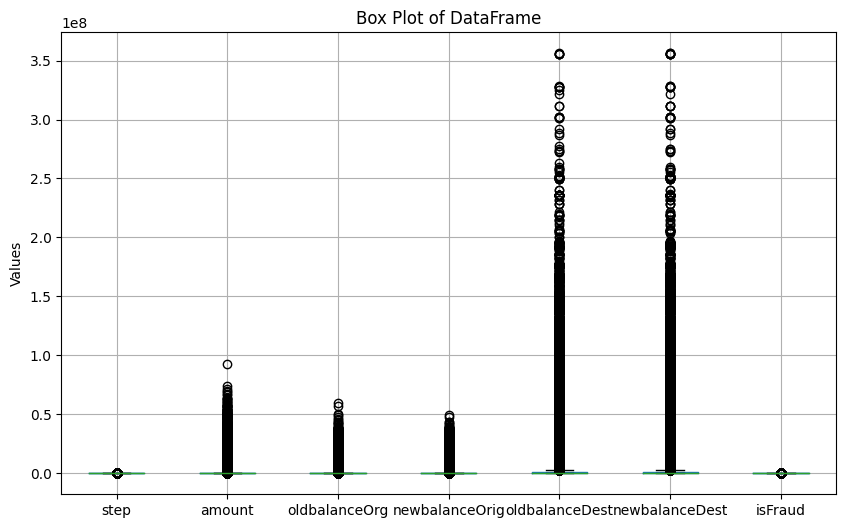

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of DataFrame')
plt.ylabel('Values')
plt.xticks()
plt.grid(True)
plt.show()

<Axes: xlabel='type', ylabel='count'>

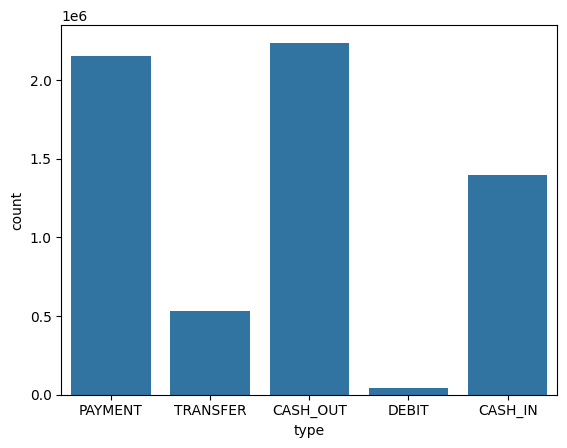

In [ ]:
#Transaction Type Distribution
sns.countplot(x='type', data=df)

<Axes: xlabel='type', ylabel='amount'>

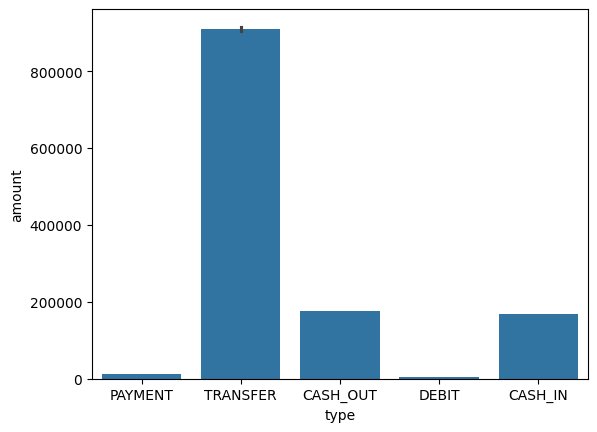

In [ ]:
#Average Transaction Amount by Type
sns.barplot(x='type', y='amount', data=df)

**Distribution of Time Steps**

<ipython-input-20-105a0f86c440>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

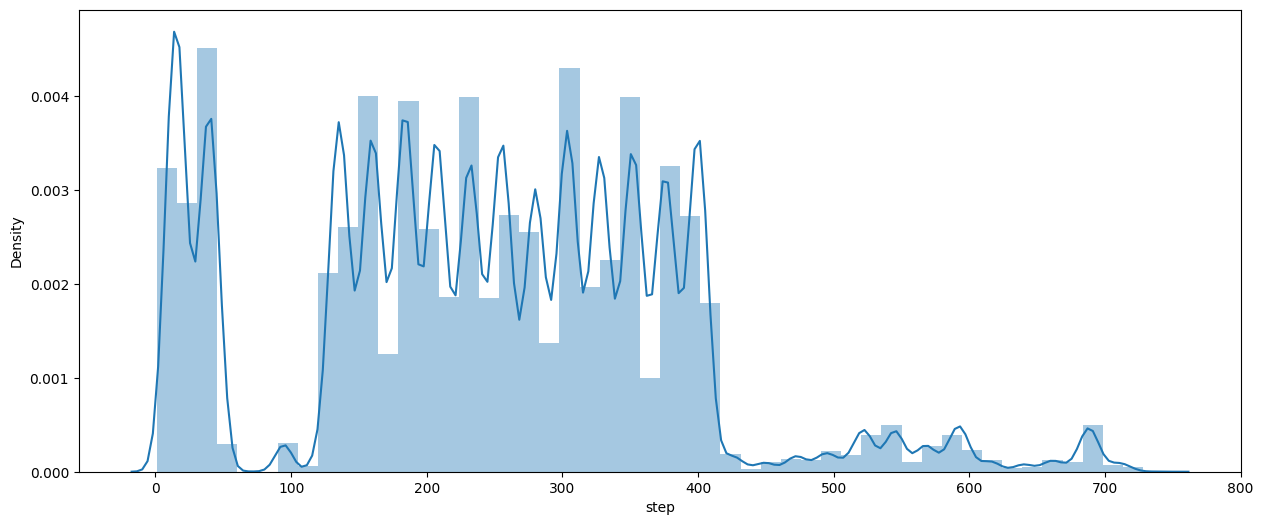

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

**Distribution of Transaction Types**

In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()


**Distribution of Key Features**

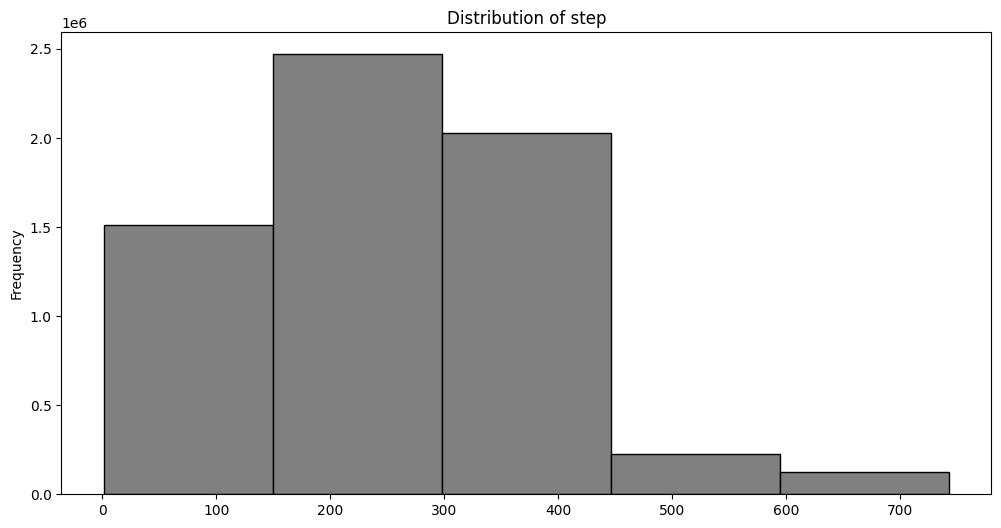

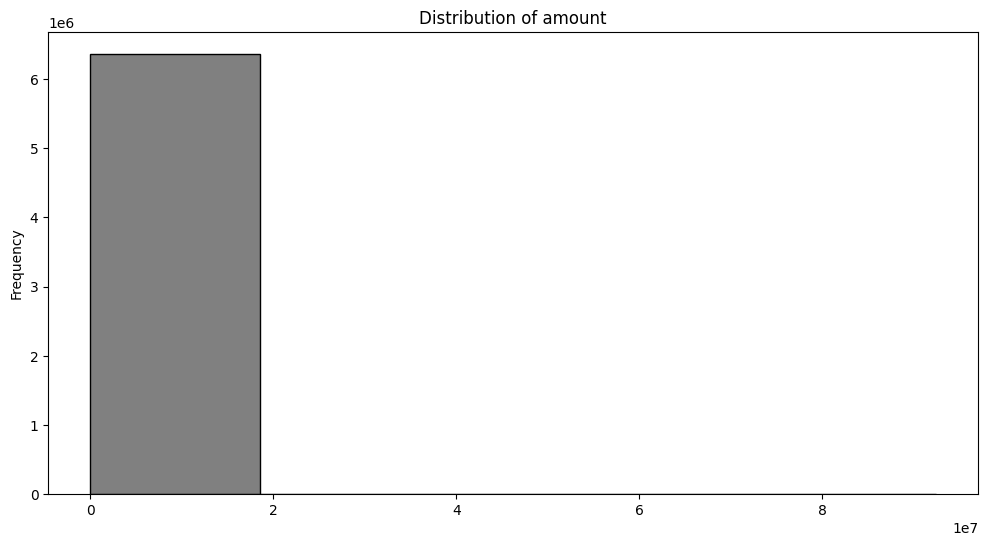

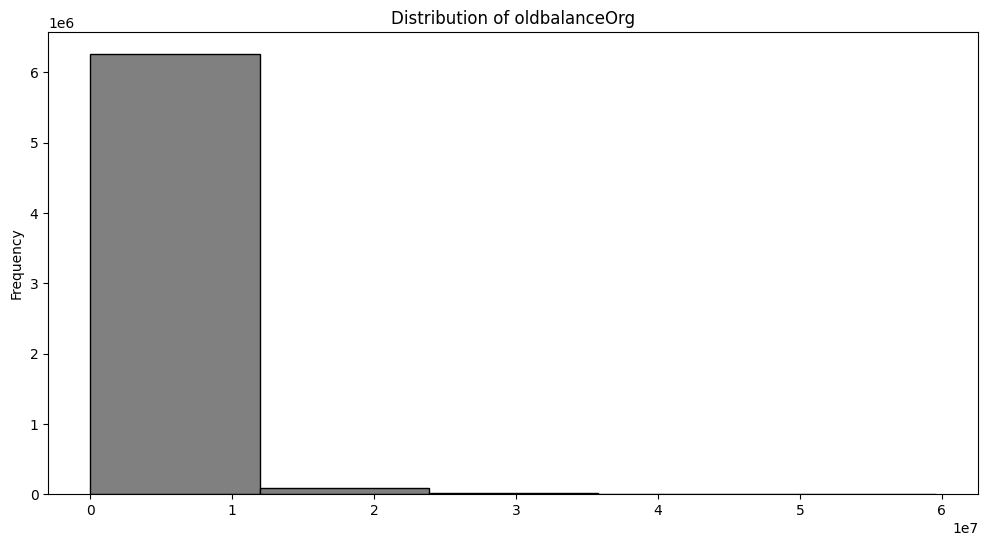

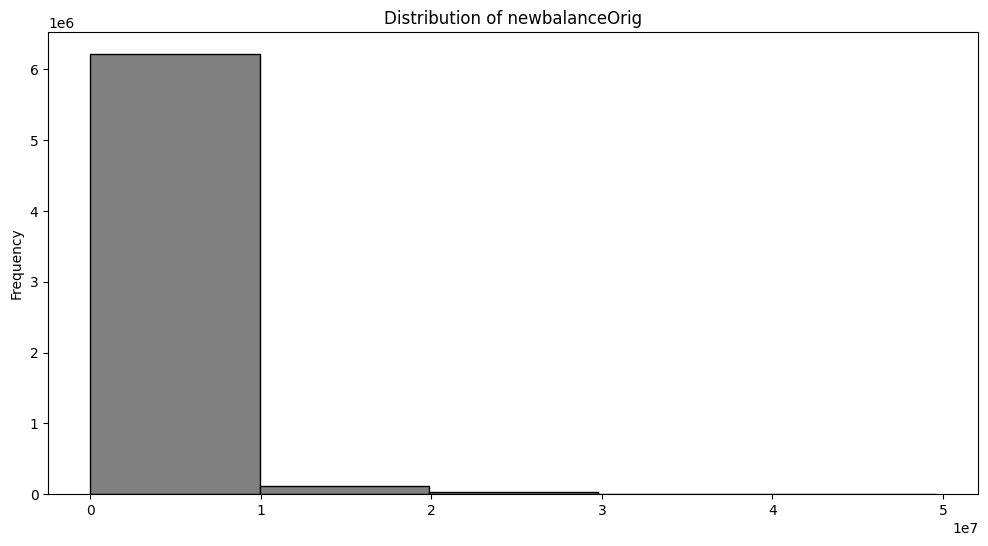

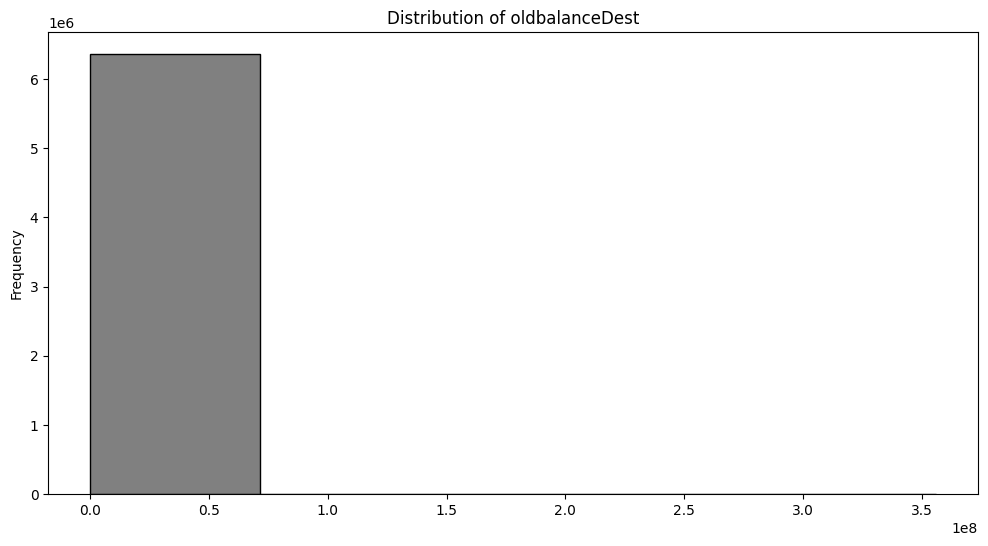

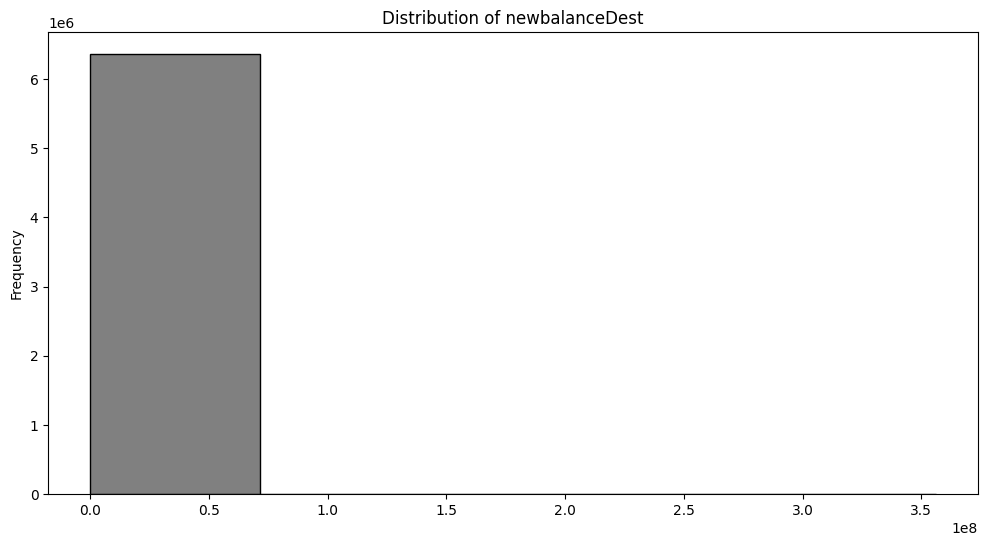

In [ ]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

**Box Plot Analysis of Key Features**

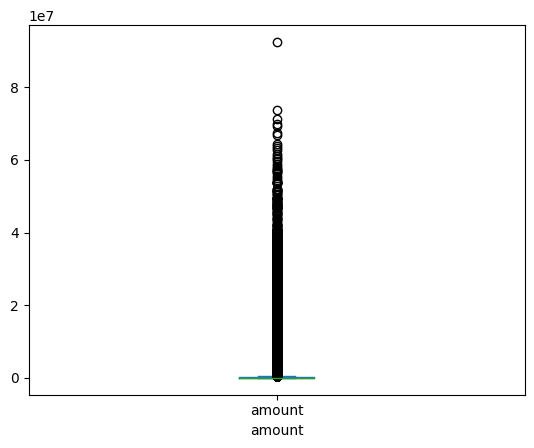

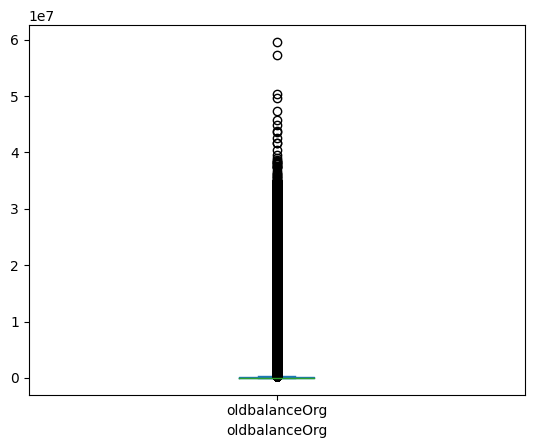

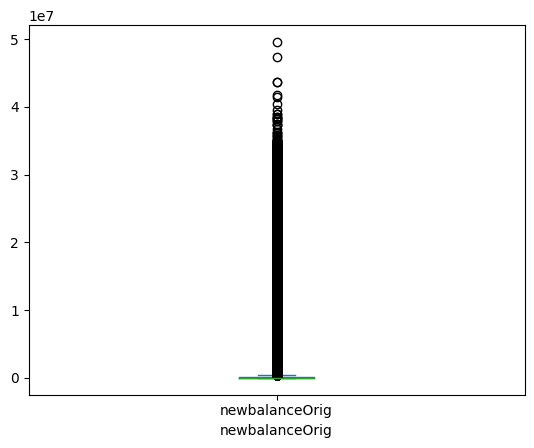

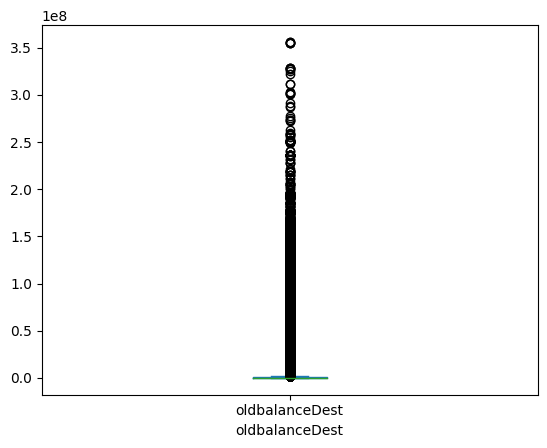

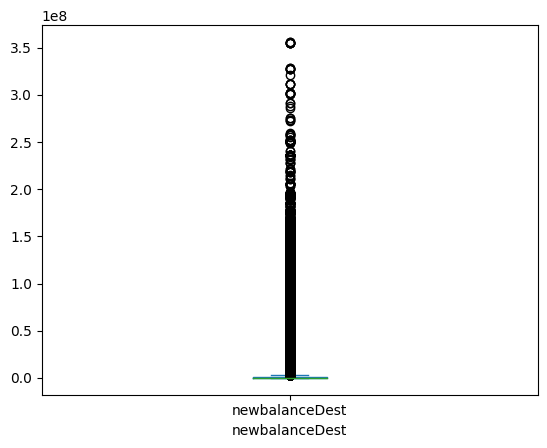

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

**Outlier Handling and Skewness Analysis of Key Features**

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




<ipython-input-25-d62b122399bb>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Number of transactions')

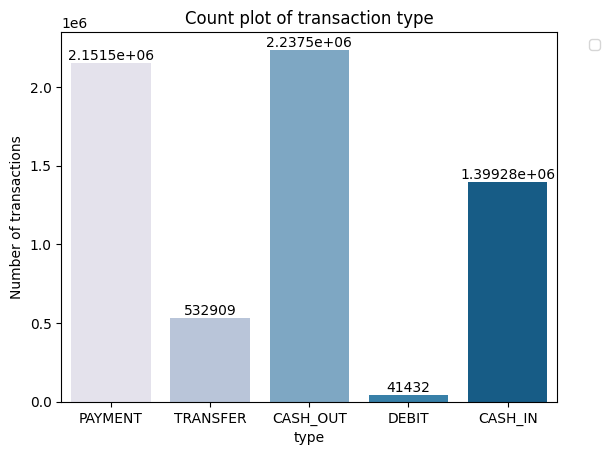

In [ ]:
#Count Plot of Transaction Types
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Text(0.5, 1.0, 'Distribution of transaction amount')

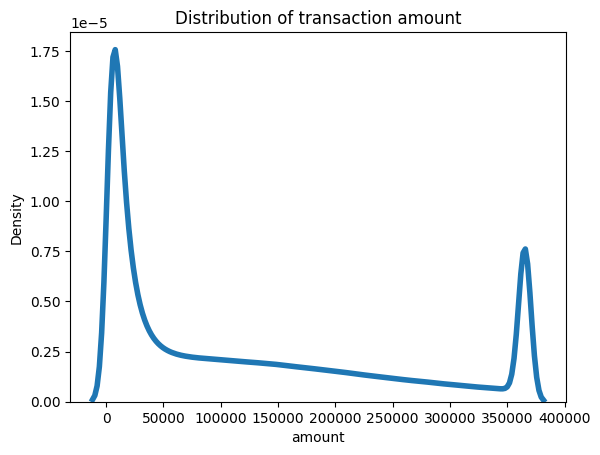

In [ ]:
#Kernel Density Estimation Plot of Transaction Amount
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of old transaction amount')

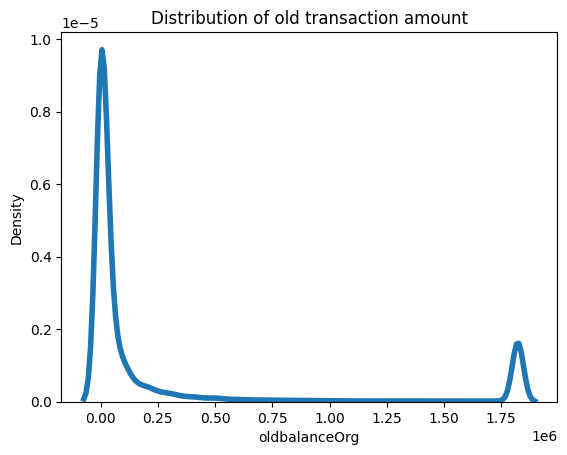

In [ ]:
#Kernel Density Estimation Plot of Old Balance in Origin Account
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of old transaction amount')

Text(0.5, 1.0, 'Distribution of new transaction amount')

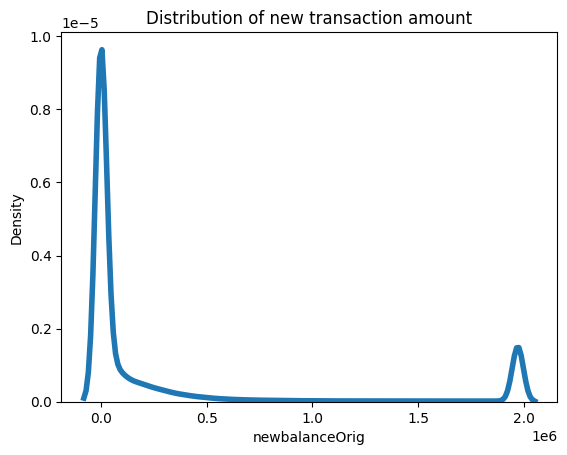

In [ ]:
#Kernel Density Estimation Plot of New Balance in Origin Account
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of new transaction amount')

Text(0.5, 1.0, 'Distribution of old transaction amount')

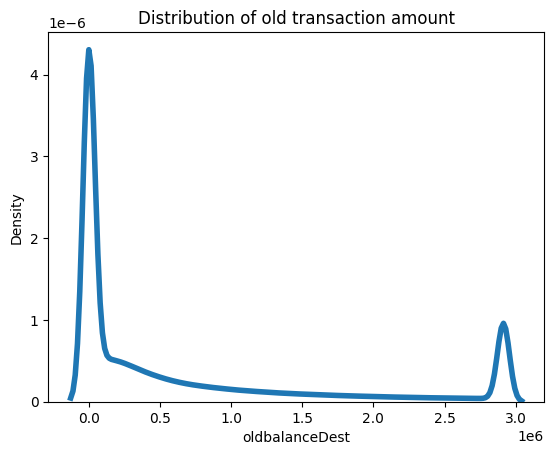

In [ ]:
#Kernel Density Estimation Plot of Old Balance in Destination Account
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of old transaction amount')

Text(0.5, 1.0, 'Distribution of new transaction amount')

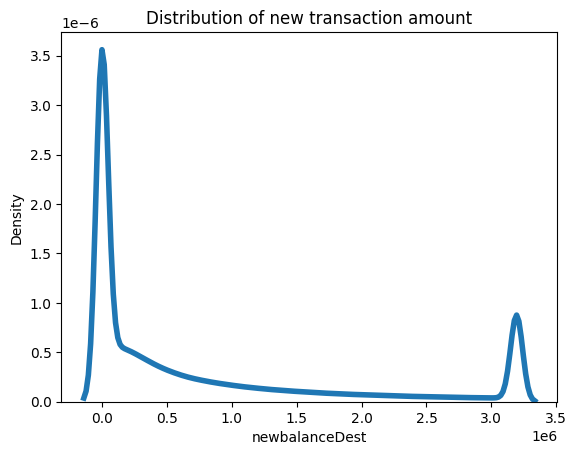

In [ ]:
##Kernel Density Estimation Plot of New Balance in Destination Account
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of new transaction amount')

**Distribution of Transaction Types with Fraudulent Transactions**

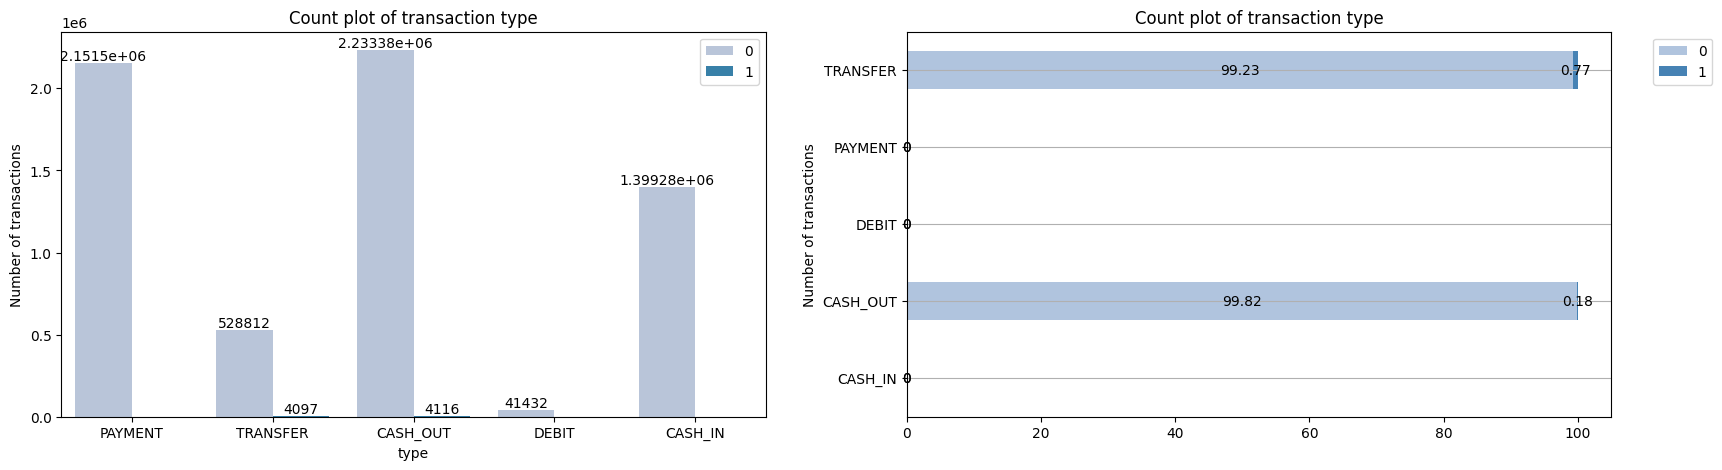

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

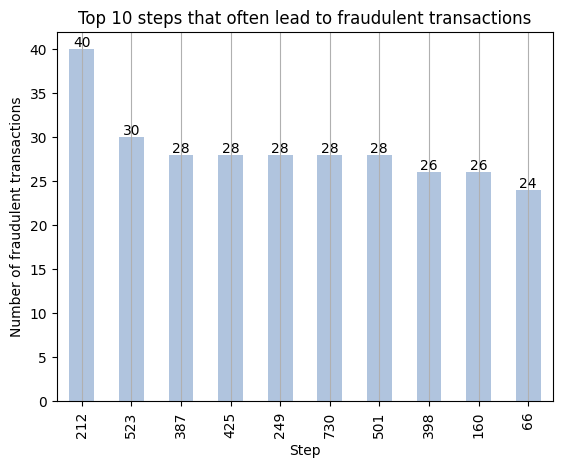

In [ ]:
#Top 10 Steps Leading to Fraudulent Transactions
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

<Axes: ylabel='step'>

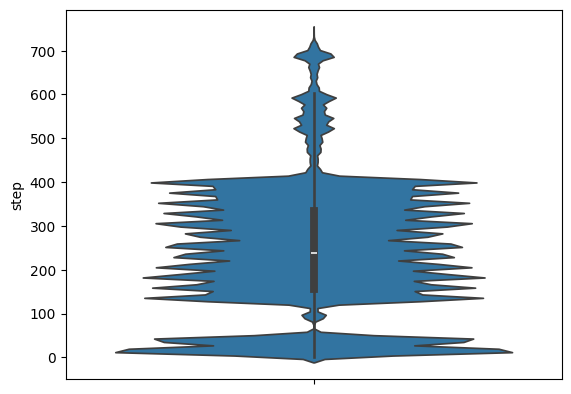

In [ ]:
#Violin Plot of Time Steps
sns.violinplot(df['step'])

(0.0, 100000.0)

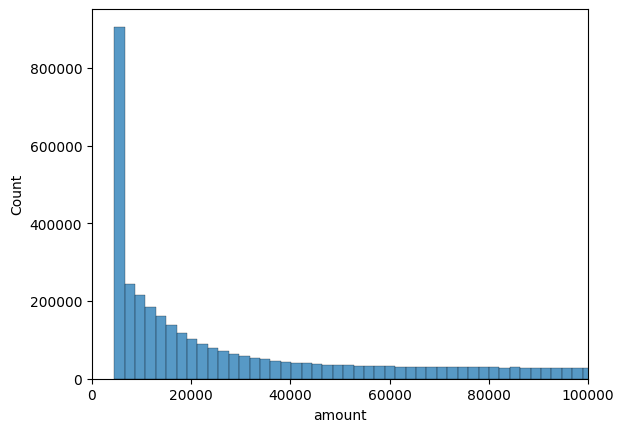

In [ ]:
#Histogram of Transaction Amounts
plt.ticklabel_format(style="plain", axis='x')
sns.histplot(df['amount'])
plt.xlim(0,100000)

**Minimum and Maximum Values of Key Columns**

In [ ]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True
    )
)

    columns           min value         max value
--  --------------  -----------  ----------------
 0  amount               4501.3  365423
 1  oldbalanceOrg           0         1.82251e+06
 2  newbalanceOrig          0         1.97034e+06
 3  oldbalanceDest          0         2.91427e+06
 4  isFraud                 0         1


#Balancing the Dataset

In [ ]:

# Separate samples for class 0 and class 1
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]

# Randomly sample 8213 samples from class 0
class_0_sampled = class_0.sample(n=8213, random_state=42)

# Combine sampled data from both classes
balanced_df = pd.concat([class_0_sampled, class_1])

In [ ]:
balanced_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1777056,162,CASH_OUT,183806.320,C691771226,19391.000,0.00,C1416312719,382572.190,566378.510,0
1350600,137,PAYMENT,4501.300,C203378011,0.000,0.00,M42773300,0.000,0.000,0
1991933,179,PAYMENT,4501.300,C1698571270,19853.000,16374.82,M643984524,0.000,0.000,0
5092368,355,PAYMENT,4501.300,C913764937,5769.170,4053.13,M1387429131,0.000,0.000,0
5066515,354,CASH_IN,253129.930,C2017736577,1328499.490,1581629.42,C407484102,2713220.480,2460090.550,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.00,C776919290,0.000,339682.130,1
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.00,C1881841831,0.000,0.000,1
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.00,C1365125890,68488.840,3194869.671,1
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.00,C2080388513,0.000,0.000,1


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the "type" column
# Perform one-hot encoding
df_encoded = pd.get_dummies(balanced_df, columns=['type'])

# Remove the original "type" column
#df_encoded.drop(columns=['type'], inplace=True)

# Now df_encoded contains the original DataFrame with "type" column replaced with one-hot encoded columns


In [ ]:
df=df_encoded
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1777056,162,183806.320,C691771226,19391.000,0.00,C1416312719,382572.190,566378.510,0,False,True,False,False,False
1350600,137,4501.300,C203378011,0.000,0.00,M42773300,0.000,0.000,0,False,False,False,True,False
1991933,179,4501.300,C1698571270,19853.000,16374.82,M643984524,0.000,0.000,0,False,False,False,True,False
5092368,355,4501.300,C913764937,5769.170,4053.13,M1387429131,0.000,0.000,0,False,False,False,True,False
5066515,354,253129.930,C2017736577,1328499.490,1581629.42,C407484102,2713220.480,2460090.550,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.130,C786484425,339682.130,0.00,C776919290,0.000,339682.130,1,False,True,False,False,False
6362616,743,365423.309,C1529008245,1822508.289,0.00,C1881841831,0.000,0.000,1,False,False,False,False,True
6362617,743,365423.309,C1162922333,1822508.289,0.00,C1365125890,68488.840,3194869.671,1,False,True,False,False,False
6362618,743,365423.309,C1685995037,850002.520,0.00,C2080388513,0.000,0.000,1,False,False,False,False,True


In [ ]:
#Removing Redundant Columns
df=df.drop(['nameOrig','nameDest'],axis=1)

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1777056,162,183806.320,19391.000,0.00,382572.190,566378.510,0,False,True,False,False,False
1350600,137,4501.300,0.000,0.00,0.000,0.000,0,False,False,False,True,False
1991933,179,4501.300,19853.000,16374.82,0.000,0.000,0,False,False,False,True,False
5092368,355,4501.300,5769.170,4053.13,0.000,0.000,0,False,False,False,True,False
5066515,354,253129.930,1328499.490,1581629.42,2713220.480,2460090.550,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.130,339682.130,0.00,0.000,339682.130,1,False,True,False,False,False
6362616,743,365423.309,1822508.289,0.00,0.000,0.000,1,False,False,False,False,True
6362617,743,365423.309,1822508.289,0.00,68488.840,3194869.671,1,False,True,False,False,False
6362618,743,365423.309,850002.520,0.00,0.000,0.000,1,False,False,False,False,True


#Principal Component Analysis (PCA)

Explained Variance Ratio:
[2.34200723e-01 2.08839650e-01 1.77254083e-01 8.64566472e-02
 7.94750851e-02 7.21078409e-02 6.17380992e-02 3.57508050e-02
 2.34892586e-02 1.37948836e-02 6.89292422e-03 8.12282011e-33]


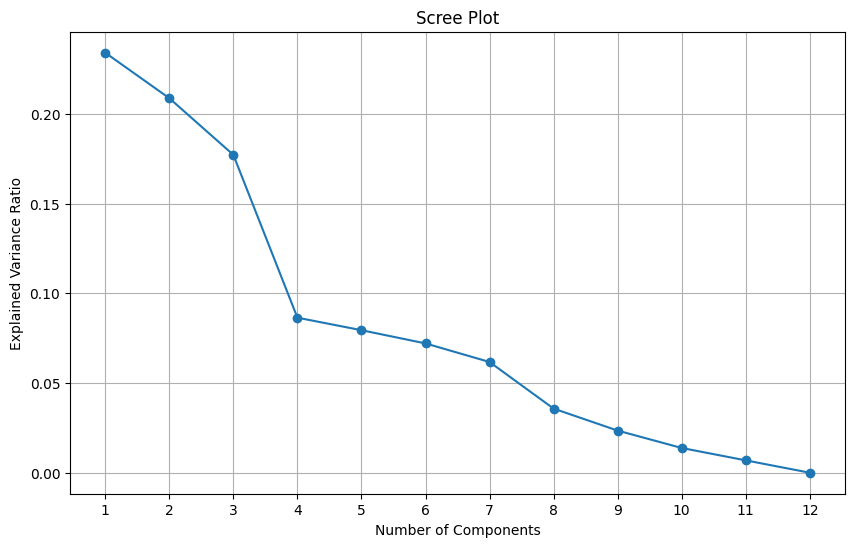

PCA Result:
        PC1       PC2
0 -0.475395  0.582082
1 -3.112520 -0.081870
2 -3.062519 -0.109476
3 -2.905038 -0.289623
4  1.170505  4.280002


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numerical columns

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_df)

# Step 3: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance)

# Step 4: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Step 5: Perform PCA with the chosen number of components
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
print("PCA Result:")
print(pca_df.head())

#  Multivariate data visualization

<Axes: >

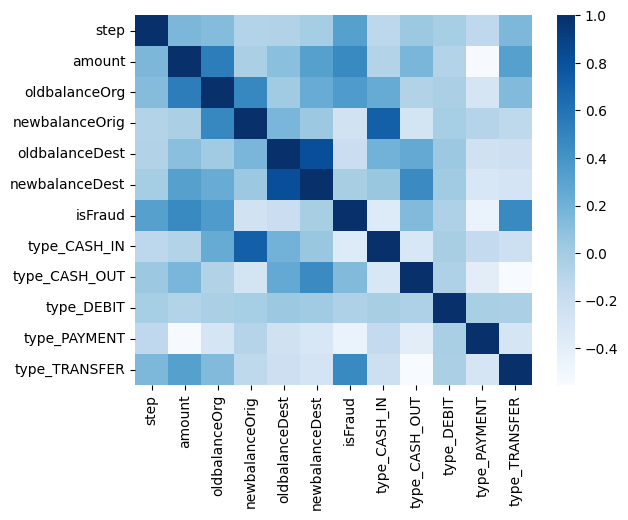

In [ ]:
# Calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='Blues' ,fmt=".3f")

In [ ]:
# Assuming df contains your features and target variable
X = df.drop(columns=['isFraud'])  # Features (remove target column)
y = df['isFraud']  # Target variable

**Train-Test Split for Model Evaluation**

In [ ]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Training and Evaluating Multiple Models**

In [ ]:
# prompt: train  models on the above dataframe df

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Create a list of models to train
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    GaussianNB()
]

# Train and evaluate each model
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    results.append({
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Recall': recall,
        'Precision': precision
    })

# Print the results
print(tabulate(results, headers='keys', tablefmt='fancy_grid'))


[LightGBM] [Info] Number of positive: 6570, number of negative: 6570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
╒════════════════════════╤════════════╤════════════╤══════════╤═════════════╕
│ Model                  │   Accuracy │   F1-Score │   Recall │   Precision │
╞════════════════════════╪════════════╪════════════╪══════════╪═════════════╡
│ LogisticRegression     │   0.876446 │   0.877267 │ 0.883141 │    0.871471 │
├────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ RandomForestClassifier │   0.993609 │   0.993638 │ 0.998174 │    0.989144 │
├────────────────────────┼────────────┼────────────┼──────────┼─────────────┤
│ KNeighborsClass

We can see from above that **XGBoost** is the best among all.

**It's Confusion Matrix

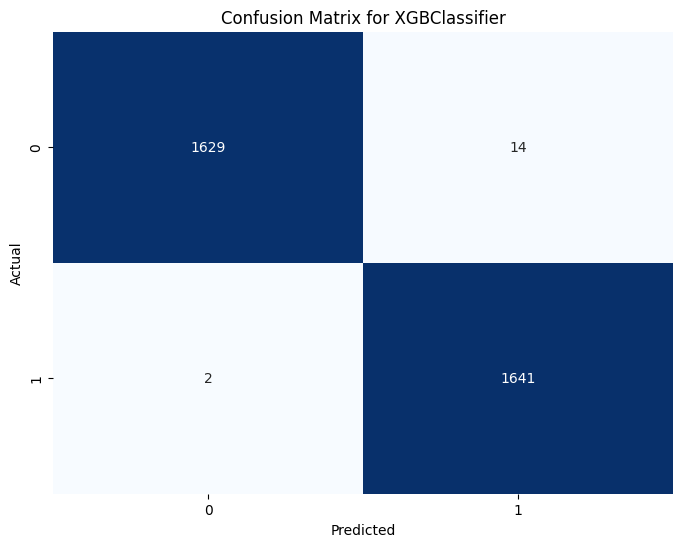

Accuracy: 0.9951
F1 Score: 0.9951
Recall: 0.9988
Precision: 0.9915


In [ ]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

# Instantiate the XGBClassifier model
best_model = XGBClassifier()

# Train the model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

#Saving and Loading a Trained XGBoost Model

In [ ]:
import joblib

# Assuming 'model' is your trained XGBoost model
# Save the model to a file
joblib.dump(best_model, 'xgboost_model.pkl')

print("Model saved successfully!")


Model saved successfully!


#CONCLUSION

In conclusion, after training and evaluating multiple machine learning models on our dataset, it is evident that **XGBoost** outperforms the other models in terms of predictive accuracy, F1-score, recall, and precision. With its robust performance and ability to handle complex datasets, XGBoost emerges as the top-performing model for our task of fraud detection in online payments. Its superior performance makes it the recommended choice for deployment in real-world applications where accurate fraud detection is crucial.